# Problem statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’ and communicate with the potential leads rather than making calls to everyone.

The company wants us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data cleaning

In [2]:
# Importing and reading the csv file

Leads_1 = pd.read_csv(r"C:\Users\dell\Desktop\Leads.csv")
Leads_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Checking the shape of data

Leads_1.shape

(9240, 37)

In [4]:
# Checking correctness of datatypes of each column

Leads_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

**The datatypes are correctly matched.**

___Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.___ 

**Because the customer would have rather skipped that step or wished not to specify. Hence, we can consider it as null value.**

In [5]:
# Replacing all 'Select' values in our data with 'NaN'

Leads_2 = Leads_1.replace('Select', np.nan)

In [6]:
Leads_2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# .isnull() command by default gives the null values in columns
# .sum() sums up the missing values (column-wise)

Leads_2.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Summing up the missing values in columns
# Total missing values in each column is divided by total number of rows 
# Total number of rows is obtained by length of the index column
# The obtained value is multiplied by 100 to get the percentage and rounded off up to 2 decimal points

round(100*(Leads_2.isnull().sum()/len(Leads_2.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Dropping those columns which have missing percentage greater than 45%

Imputing 50% of missing values in each of these columns will affect our model drastically. Hence, I chose to remove them

- **How did you hear about X Education** - 78.46
- **Lead Quality** - 51.59
- **Lead Profile** - 74.19
- **Asymmetrique Activity Index** - 45.65
- **Asymmetrique profile Index** - 45.65
- **Asymmetrique Activity Score** - 45.65
- **Asymmetrique profile Score** - 45.65

### Also dropping the below columns as these are not useful in our model building

- **Prospect ID** - A unique ID with which the customer is identified assigned by sales team.


- **Lead Number** - A unique ID with which the customer is identified assigned by sales team.


- **Tags** - Tags assigned to customers indicating the current status of the lead. Tags is not an important column because it is generated after someone from the sales team gets in touch with the lead. It's a column that is manually filled up by the Sales team. Since we are doing the modelling to predict to whom to call, Tags column will not be useful.


- **Last Activity** - As the columns 'Last Activity' and 'Last Notable Activity' both are same with slight difference. 'Last Notable Activity' is an intermediate column which is an update while the sales team representative is in touch with the lead. 'Last Activity' is a column that talks about the last activity when the lead was closed from the sales team side. I'm removing 'Last Activity' because, the values of this column are generated when the lead was either closed or converted from the sales team side and this will not help in lead conversion any further. 

In [9]:
# To treat the missing values, lets get the list of the column names

list(Leads_2)

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [10]:
# Dropping the above mentioned columns
# Checking the % null values again

Leads_2 = Leads_2.drop(['Prospect ID', 'Lead Number', 'Last Activity', 'How did you hear about X Education', 'Tags', 
                        'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                        'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

round(100*(Leads_2.isnull().sum()/len(Leads_2.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

## Checking data imbalance of categorical columns

In [11]:
# Getting the list of categorical columns

cat_columns = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Country','Specialization',
               'What is your current occupation','What matters most to you in choosing a course','Search','Magazine',
               'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
               'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'City','I agree to pay the amount through cheque','A free copy of Mastering The Interview',
               'Last Notable Activity']

In [12]:
Leads_2['Lead Origin'] = Leads_2['Lead Origin'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Lead Origin'].value_counts()/len(Leads_2.index)),2)

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

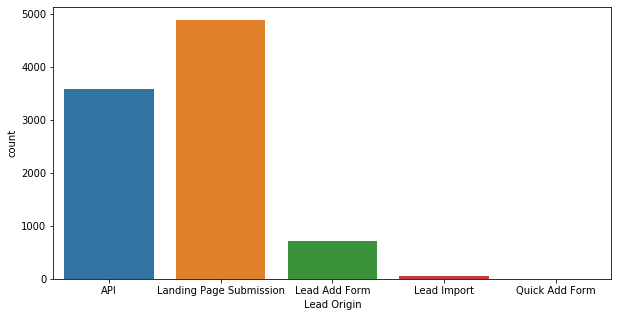

In [13]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(Leads_2['Lead Origin'])

**The variable mentioned above 'Lead Origin' has total 5 categories of which last three amount to less than 10%. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [14]:
Leads_2['Lead Origin'] = Leads_2['Lead Origin'].replace({'Lead Add Form':'Other', 'Lead Import':'Other', 
                                                         'Quick Add Form':'Other'})

round(100*(Leads_2['Lead Origin'].value_counts()/len(Leads_2.index)),2)

Landing Page Submission    52.88
API                        38.74
Other                       8.38
Name: Lead Origin, dtype: float64

In [15]:
Leads_2['Lead Source'] = Leads_2['Lead Source'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Lead Source'].value_counts()/len(Leads_2.index)),2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
Pay per Click Ads     0.01
welearnblog_Home      0.01
NC_EDM                0.01
WeLearn               0.01
blog                  0.01
testone               0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64

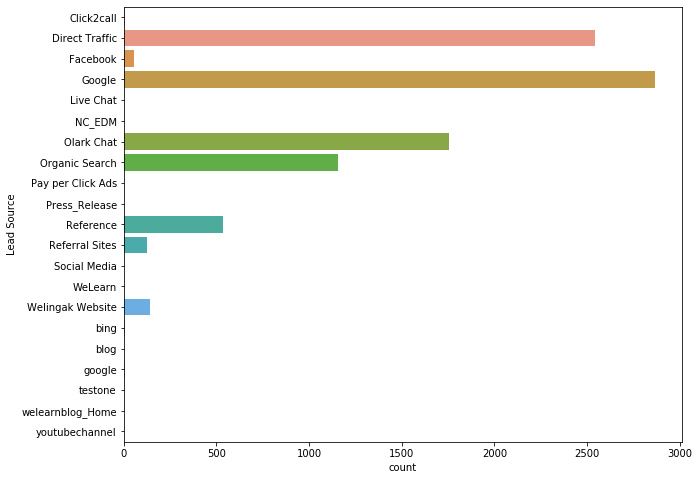

In [16]:
# Plotting the above column

plt.figure(figsize = (10,8))
sns.countplot(y = Leads_2['Lead Source'])

**The variable mentioned above 'Lead Source' has total 21 categories of which 18 categories contribution is very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [17]:
Leads_2['Lead Source'] = Leads_2['Lead Source'].replace({'Organic Search':'Other','Reference':'Other',
                                                         'Welingak Website':'Other','Referral Sites':'Other','Facebook':'Other',
                                                         'bing':'Other','google':'Google','Click2call':'Other',
                                                         'Press_Release':'Other','Social Media':'Other','Live Chat':'Other',
                                                         'Pay per Click Ads':'Other','welearnblog_Home':'Other',
                                                         'NC_EDM':'Other','WeLearn':'Other','blog':'Other','testone':'Other',
                                                         'youtubechannel':'Other'})

round(100*(Leads_2['Lead Source'].value_counts()/len(Leads_2.index)),2)

Google            31.09
Direct Traffic    27.52
Other             22.00
Olark Chat        18.99
Name: Lead Source, dtype: float64

In [18]:
Leads_2['Do Not Email'] = Leads_2['Do Not Email'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Do Not Email'].value_counts()/len(Leads_2.index)),2)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

In [19]:
Leads_2['Do Not Call'] = Leads_2['Do Not Call'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Do Not Call'].value_counts()/len(Leads_2.index)),2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [20]:
Leads_2['Country'] = Leads_2['Country'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Country'].value_counts()/len(Leads_2.index)),2)

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Sweden                   0.03
Belgium                  0.02
Bangladesh               0.02
China                    0.02
Ghana                    0.02
Asia/Pacific Region      0.02
Italy                    0.02
Netherlands              0.02
Philippines              0.02
Uganda                   0.02
Indonesia                0.01
Kenya                    0.01
Liberia                  0.01
Vietnam                  0.01
Denmark                  0.01
Russia    

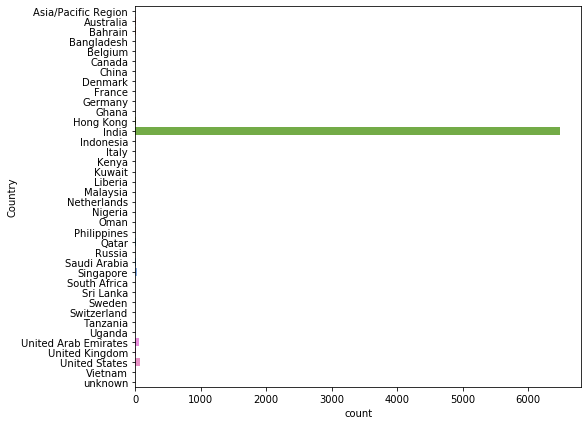

In [21]:
# Plotting the above column

plt.figure(figsize = (8,7))
sns.countplot(y = Leads_2['Country'])

**The variable mentioned above 'Country' has total 38 categories of which 37 categories contribution is very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [22]:
Leads_2['Country'] = Leads_2['Country'].replace({'United States':'Other', 'United Arab Emirates':'Other', 'Singapore':'Other',
                                                 'Saudi Arabia':'Other', 'United Kingdom':'Other', 'Australia':'Other',
                                                 'Qatar':'Other', 'Hong Kong':'Other', 'Bahrain':'Other', 'Oman':'Other',
                                                 'France':'Other', 'unknown':'Other', 'South Africa':'Other', 'Canada':'Other',
                                                 'Nigeria':'Other', 'Germany':'Other', 'Kuwait':'Other', 'Sweden':'Other',
                                                 'Belgium':'Other', 'Bangladesh':'Other', 'China':'Other', 'Ghana':'Other',
                                                 'Asia/Pacific Region':'Other', 'Italy':'Other', 'Netherlands':'Other',
                                                 'Philippines':'Other', 'Uganda':'Other', 'Indonesia':'Other', 'Kenya':'Other',
                                                 'Liberia':'Other', 'Vietnam':'Other', 'Denmark':'Other', 'Russia':'Other',
                                                 'Sri Lanka':'Other', 'Switzerland':'Other', 'Tanzania':'Other', 
                                                 'Malaysia':'Other'})

round(100*(Leads_2['Country'].value_counts()/len(Leads_2.index)),2)

India    70.26
Other     3.11
Name: Country, dtype: float64

In [23]:
Leads_2['Specialization'] = Leads_2['Specialization'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Specialization'].value_counts()/len(Leads_2.index)),2)

Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Media and Advertising                 2.20
Travel and Tourism                    2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

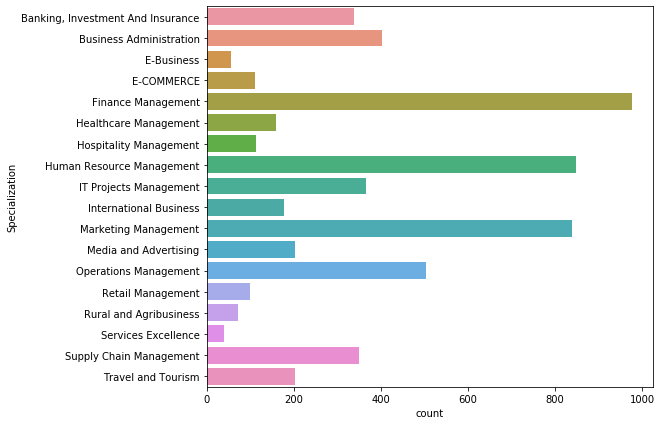

In [24]:
# Plotting the above column

plt.figure(figsize = (8,7))
sns.countplot(y = Leads_2['Specialization'])

**The variable mentioned above 'Specialization' has total 18 categories of which 8 categories contribution is very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [25]:
Leads_2['Specialization'] = Leads_2['Specialization'].replace({'International Business':'Other','Healthcare Management':'Other',
                                                               'Hospitality Management':'Other', 'E-COMMERCE':'Other',
                                                               'Retail Management':'Other', 'Rural and Agribusiness':'Other',
                                                               'E-Business':'Other', 'Services Excellence':'Other'})

round(100*(Leads_2['Specialization'].value_counts()/len(Leads_2.index)),2)

Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Other                                 9.02
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
Name: Specialization, dtype: float64

In [26]:
Leads_2['What is your current occupation'] = Leads_2['What is your current occupation'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['What is your current occupation'].value_counts()/len(Leads_2.index)),2)

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

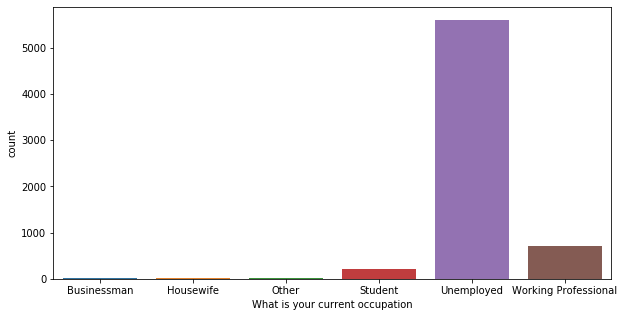

In [27]:
# Plotting the above column

plt.figure(figsize = (10,5))
sns.countplot(Leads_2['What is your current occupation'])

**The variable mentioned above 'What is your current occupation' has total 6 categories of which 4 categories contribution is very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [28]:
Leads_2['What is your current occupation'] = Leads_2['What is your current occupation'].replace({'Housewife':'Other',
                                                                                                 'Businessman':'Other'})

round(100*(Leads_2['What is your current occupation'].value_counts()/len(Leads_2.index)),2)

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.37
Name: What is your current occupation, dtype: float64

In [29]:
Leads_2['What matters most to you in choosing a course'] = Leads_2['What matters most to you in choosing a course'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['What matters most to you in choosing a course'].value_counts()/len(Leads_2.index)),2)

Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

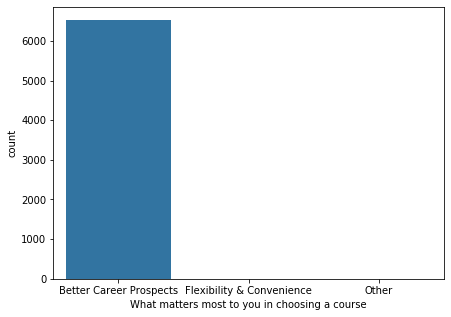

In [30]:
# Plotting the above column

plt.figure(figsize = (7,5))
sns.countplot(Leads_2['What matters most to you in choosing a course'])

**The variable mentioned above 'What is your current occupation' has total 3 categories of which 2 categories contribution is very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [31]:
Leads_2['What matters most to you in choosing a course'] = Leads_2['What matters most to you in choosing a course'].replace({'Flexibility & Convenience':'Other'})

round(100*(Leads_2['What matters most to you in choosing a course'].value_counts()/len(Leads_2.index)),2)

Better Career Prospects    70.65
Other                       0.03
Name: What matters most to you in choosing a course, dtype: float64

In [32]:
Leads_2['Search'] = Leads_2['Search'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Search'].value_counts()/len(Leads_2.index)),2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [33]:
Leads_2['Magazine'] = Leads_2['Magazine'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Magazine'].value_counts()/len(Leads_2.index)),2)

No    100.0
Name: Magazine, dtype: float64

In [34]:
Leads_2['Newspaper Article'] = Leads_2['Newspaper Article'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Newspaper Article'].value_counts()/len(Leads_2.index)),2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [35]:
Leads_2['X Education Forums'] = Leads_2['X Education Forums'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['X Education Forums'].value_counts()/len(Leads_2.index)),2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [36]:
Leads_2['Newspaper'] = Leads_2['Newspaper'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Newspaper'].value_counts()/len(Leads_2.index)),2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [37]:
Leads_2['Digital Advertisement'] = Leads_2['Digital Advertisement'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Digital Advertisement'].value_counts()/len(Leads_2.index)),2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [38]:
Leads_2['Through Recommendations'] = Leads_2['Through Recommendations'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Through Recommendations'].value_counts()/len(Leads_2.index)),2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [39]:
Leads_2['Receive More Updates About Our Courses'] = Leads_2['Receive More Updates About Our Courses'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Receive More Updates About Our Courses'].value_counts()/len(Leads_2.index)),2)

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [40]:
Leads_2['Update me on Supply Chain Content'] = Leads_2['Update me on Supply Chain Content'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Update me on Supply Chain Content'].value_counts()/len(Leads_2.index)),2)

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [41]:
Leads_2['Get updates on DM Content'] = Leads_2['Get updates on DM Content'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Get updates on DM Content'].value_counts()/len(Leads_2.index)),2)

No    100.0
Name: Get updates on DM Content, dtype: float64

In [42]:
Leads_2['City'] = Leads_2['City'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['City'].value_counts()/len(Leads_2.index)),2)

Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

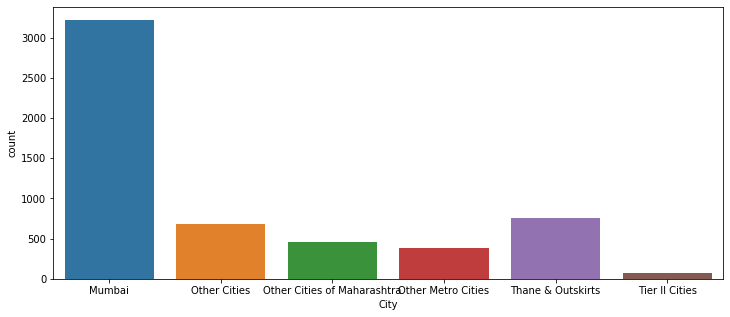

In [43]:
# Plotting the above column

plt.figure(figsize = (12,5))
sns.countplot(Leads_2['City'])

**The variable mentioned above 'City' has total 6 categories of which 4 categories contribution is very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [44]:
Leads_2['City'] = Leads_2['City'].replace({'Other Cities':'Other', 'Thane & Outskirts':'Other Cities of Maharashtra',
                                           'Other Metro Cities':'Other', 'Tier II Cities':'Other'})

round(100*(Leads_2['City'].value_counts()/len(Leads_2.index)),2)

Mumbai                         34.87
Other Cities of Maharashtra    13.08
Other                          12.34
Name: City, dtype: float64

In [45]:
Leads_2['I agree to pay the amount through cheque'] = Leads_2['I agree to pay the amount through cheque'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['I agree to pay the amount through cheque'].value_counts()/len(Leads_2.index)),2)

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [46]:
Leads_2['A free copy of Mastering The Interview'] = Leads_2['A free copy of Mastering The Interview'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['A free copy of Mastering The Interview'].value_counts()/len(Leads_2.index)),2)

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

In [47]:
Leads_2['Last Notable Activity'] = Leads_2['Last Notable Activity'].astype('category')

# Calculating the percentage of frequency of each category

round(100*(Leads_2['Last Notable Activity'].value_counts()/len(Leads_2.index)),2)

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
View in browser link Clicked     0.01
Resubscribed to emails           0.01
Form Submitted on Website        0.01
Email Received                   0.01
Approached upfront               0.01
Name: Last Notable Activity, dtype: float64

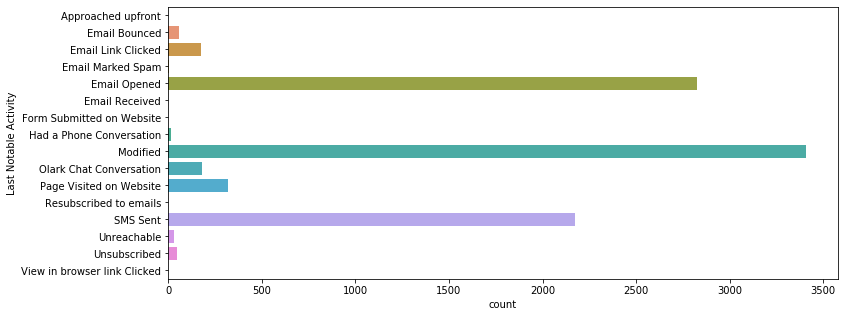

In [48]:
# Plotting the above column

plt.figure(figsize = (12,5))
sns.countplot(y = Leads_2['Last Notable Activity'])

**The variable mentioned above 'Last Notable Activity' has total 16 categories of which 13 categories contribution is very less. Lets combine them as one category 'Other' as this will reduce the number of dummies.**

In [49]:
Leads_2['Last Notable Activity'] = Leads_2['Last Notable Activity'].replace({'Page Visited on Website':'Other',
                                                                             'Olark Chat Conversation':'Other',
                                                                             'Email Link Clicked':'Other', 
                                                                             'Email Bounced':'Other',
                                                                             'Unsubscribed':'Other', 'Unreachable':'Other',
                                                                             'Had a Phone Conversation':'Other',
                                                                             'Email Marked Spam':'Other',
                                                                             'View in browser link Clicked':'Other',
                                                                             'Resubscribed to emails':'Other',
                                                                             'Form Submitted on Website':'Other',
                                                                             'Email Received':'Other', 
                                                                             'Approached upfront':'Other'})

round(100*(Leads_2['Last Notable Activity'].value_counts()/len(Leads_2.index)),2)

Modified        36.87
Email Opened    30.60
SMS Sent        23.51
Other            9.03
Name: Last Notable Activity, dtype: float64

#### The below mentioned columns are highly skewed, it is better to drop them because using them in our further analysis will produce highly biased results

- Do Not Email
- Do Not Call
- Search
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [50]:
Leads_3 = Leads_2.drop(['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                        'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                        'Update me on Supply Chain Content','Get updates on DM Content',
                        'I agree to pay the amount through cheque'], axis=1)
Leads_3.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,NaN,NaN,Unemployed,Better Career Prospects,NaN,No,Modified
1,API,Other,0,5.0,674,2.5,India,NaN,Unemployed,Better Career Prospects,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,India,NaN,Unemployed,Better Career Prospects,Mumbai,No,Modified


In [51]:
# Checking the percentage of null values by the following steps
# Summing up the missing values in columns
# Total missing values in each column is divided by total number of rows 
# Total number of rows is obtained by length of the index column
# The obtained value is multiplied by 100 to get the percentage and rounded off up to 2 decimal points

round(100*(Leads_3.isnull().sum()/len(Leads_3.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
City                                             39.71
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

**As the percentage of null values is between 20% - 40%, removing them might cause loss of data. So, let's impute each Categories to remove all the null values**

In [52]:
# Let's see the numerical columns in detail to get an idea of imputing them with mean, median or mode

Leads_3.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


**Above, we can see that there is huge difference between 75 percentile and Maximum in 'TotalVisits', 'Page Views Per Visit' columns indicating that the increase is not gradual.** 

**So, it is better to impute them with 'MEDIAN' rather than Mean or Mode because Mean value would be higher due to the presence of Outliers and Mode is not suitable for this data.**

In [53]:
# Imputing the numerical column null values with Median

Leads_3['TotalVisits'].fillna(Leads_3.TotalVisits.median(), inplace=True)
Leads_3['Page Views Per Visit'].fillna(Leads_3['Page Views Per Visit'].median(), inplace=True)

Leads_3.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
City                                             3669
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [54]:
# Imputing the Categorical Column null values with Mode

Leads_3['Lead Source'].fillna(Leads_3['Lead Source'].mode()[0], inplace=True)

Leads_3['Country'].fillna(Leads_3['Country'].mode()[0], inplace=True)

Leads_3['Specialization'].fillna(Leads_3['Specialization'].mode()[0], inplace=True)

Leads_3['What is your current occupation'].fillna(Leads_3['What is your current occupation'].mode()[0], inplace=True)

Leads_3['What matters most to you in choosing a course'].fillna(Leads_3['What matters most to you in choosing a course'].mode()[0], inplace=True)

Leads_3['City'].fillna(Leads_3['City'].mode()[0], inplace=True)

Leads_3.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
City                                             0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [55]:
Leads_3['Country'] = Leads_3['Country'].astype('category')

round(100*(Leads_3['Country'].value_counts()/len(Leads_3.index)),2)

India    96.89
Other     3.11
Name: Country, dtype: float64

In [56]:
Leads_3['What matters most to you in choosing a course'] = Leads_3['What matters most to you in choosing a course'].astype('category')

round(100*(Leads_3['What matters most to you in choosing a course'].value_counts()/len(Leads_3.index)),2)

Better Career Prospects    99.97
Other                       0.03
Name: What matters most to you in choosing a course, dtype: float64

**The above two columns, 'Country' and 'What matters most to you in choosing a course' are now highly skewed as we replaced the null values with mode. So, we need to drop them because they result in biased analysis.**

In [57]:
Leads_4 = Leads_3.drop(['Country', 'What matters most to you in choosing a course'], axis=1)

Leads_4.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Finance Management,Unemployed,Mumbai,No,Modified
1,API,Other,0,5.0,674,2.5,Finance Management,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Finance Management,Unemployed,Mumbai,No,Modified


In [58]:
# Checking the shape of our final data set

Leads_4.shape

(9240, 11)

**We are done with Data Cleaning, now we can move to Model Building using Logistic Regression because here the Output variable is Categorical variable**

# Data preparation

In [59]:
# Creating a dummy variables for categorical columns

Leads_5 = pd.get_dummies(data = Leads_4, columns = ['Lead Origin', 'Lead Source', 'Specialization',
                                                    'What is your current occupation', 'City',
                                                    'A free copy of Mastering The Interview', 'Last Notable Activity'])
Leads_5.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other,City_Other Cities of Maharashtra,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
2,1,2.0,1532,2.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
3,0,1.0,305,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0


# Dividing the data into Train and Test sets

**I am dividing the data in 70:30 train and test ratio using Scikit Learn Library.**

In [60]:
# Splitting the data into train and test
# Setting the seed value to a constant so that we get the same output always 

from sklearn.model_selection import train_test_split

Leads_train, Leads_test = train_test_split(Leads_5, train_size = 0.7, random_state = 0)

In [61]:
# Lets check the shape of train and test data 

print(Leads_train.shape)
print(Leads_test.shape)

(6468, 35)
(2772, 35)


# Scaling the data

Here, we can see that except for dummy columns that we have created, few other columns have varied integer or float values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

In [62]:
# I'm using Standard scaling
# Applying Standard scaler to all numeric columns except the 'dummy' variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Leads_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(Leads_train[['TotalVisits',
                                                                                'Total Time Spent on Website',
                                                                                 'Page Views Per Visit']])

Leads_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other,City_Other Cities of Maharashtra,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
6627,1,-0.279870,1.127624,-0.174194,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4953,0,0.289435,-0.523427,1.195387,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
5111,0,0.099666,-0.444980,0.738860,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
1906,0,-0.279870,1.682232,-0.630721,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4917,0,-0.659406,-0.890125,-1.087247,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0


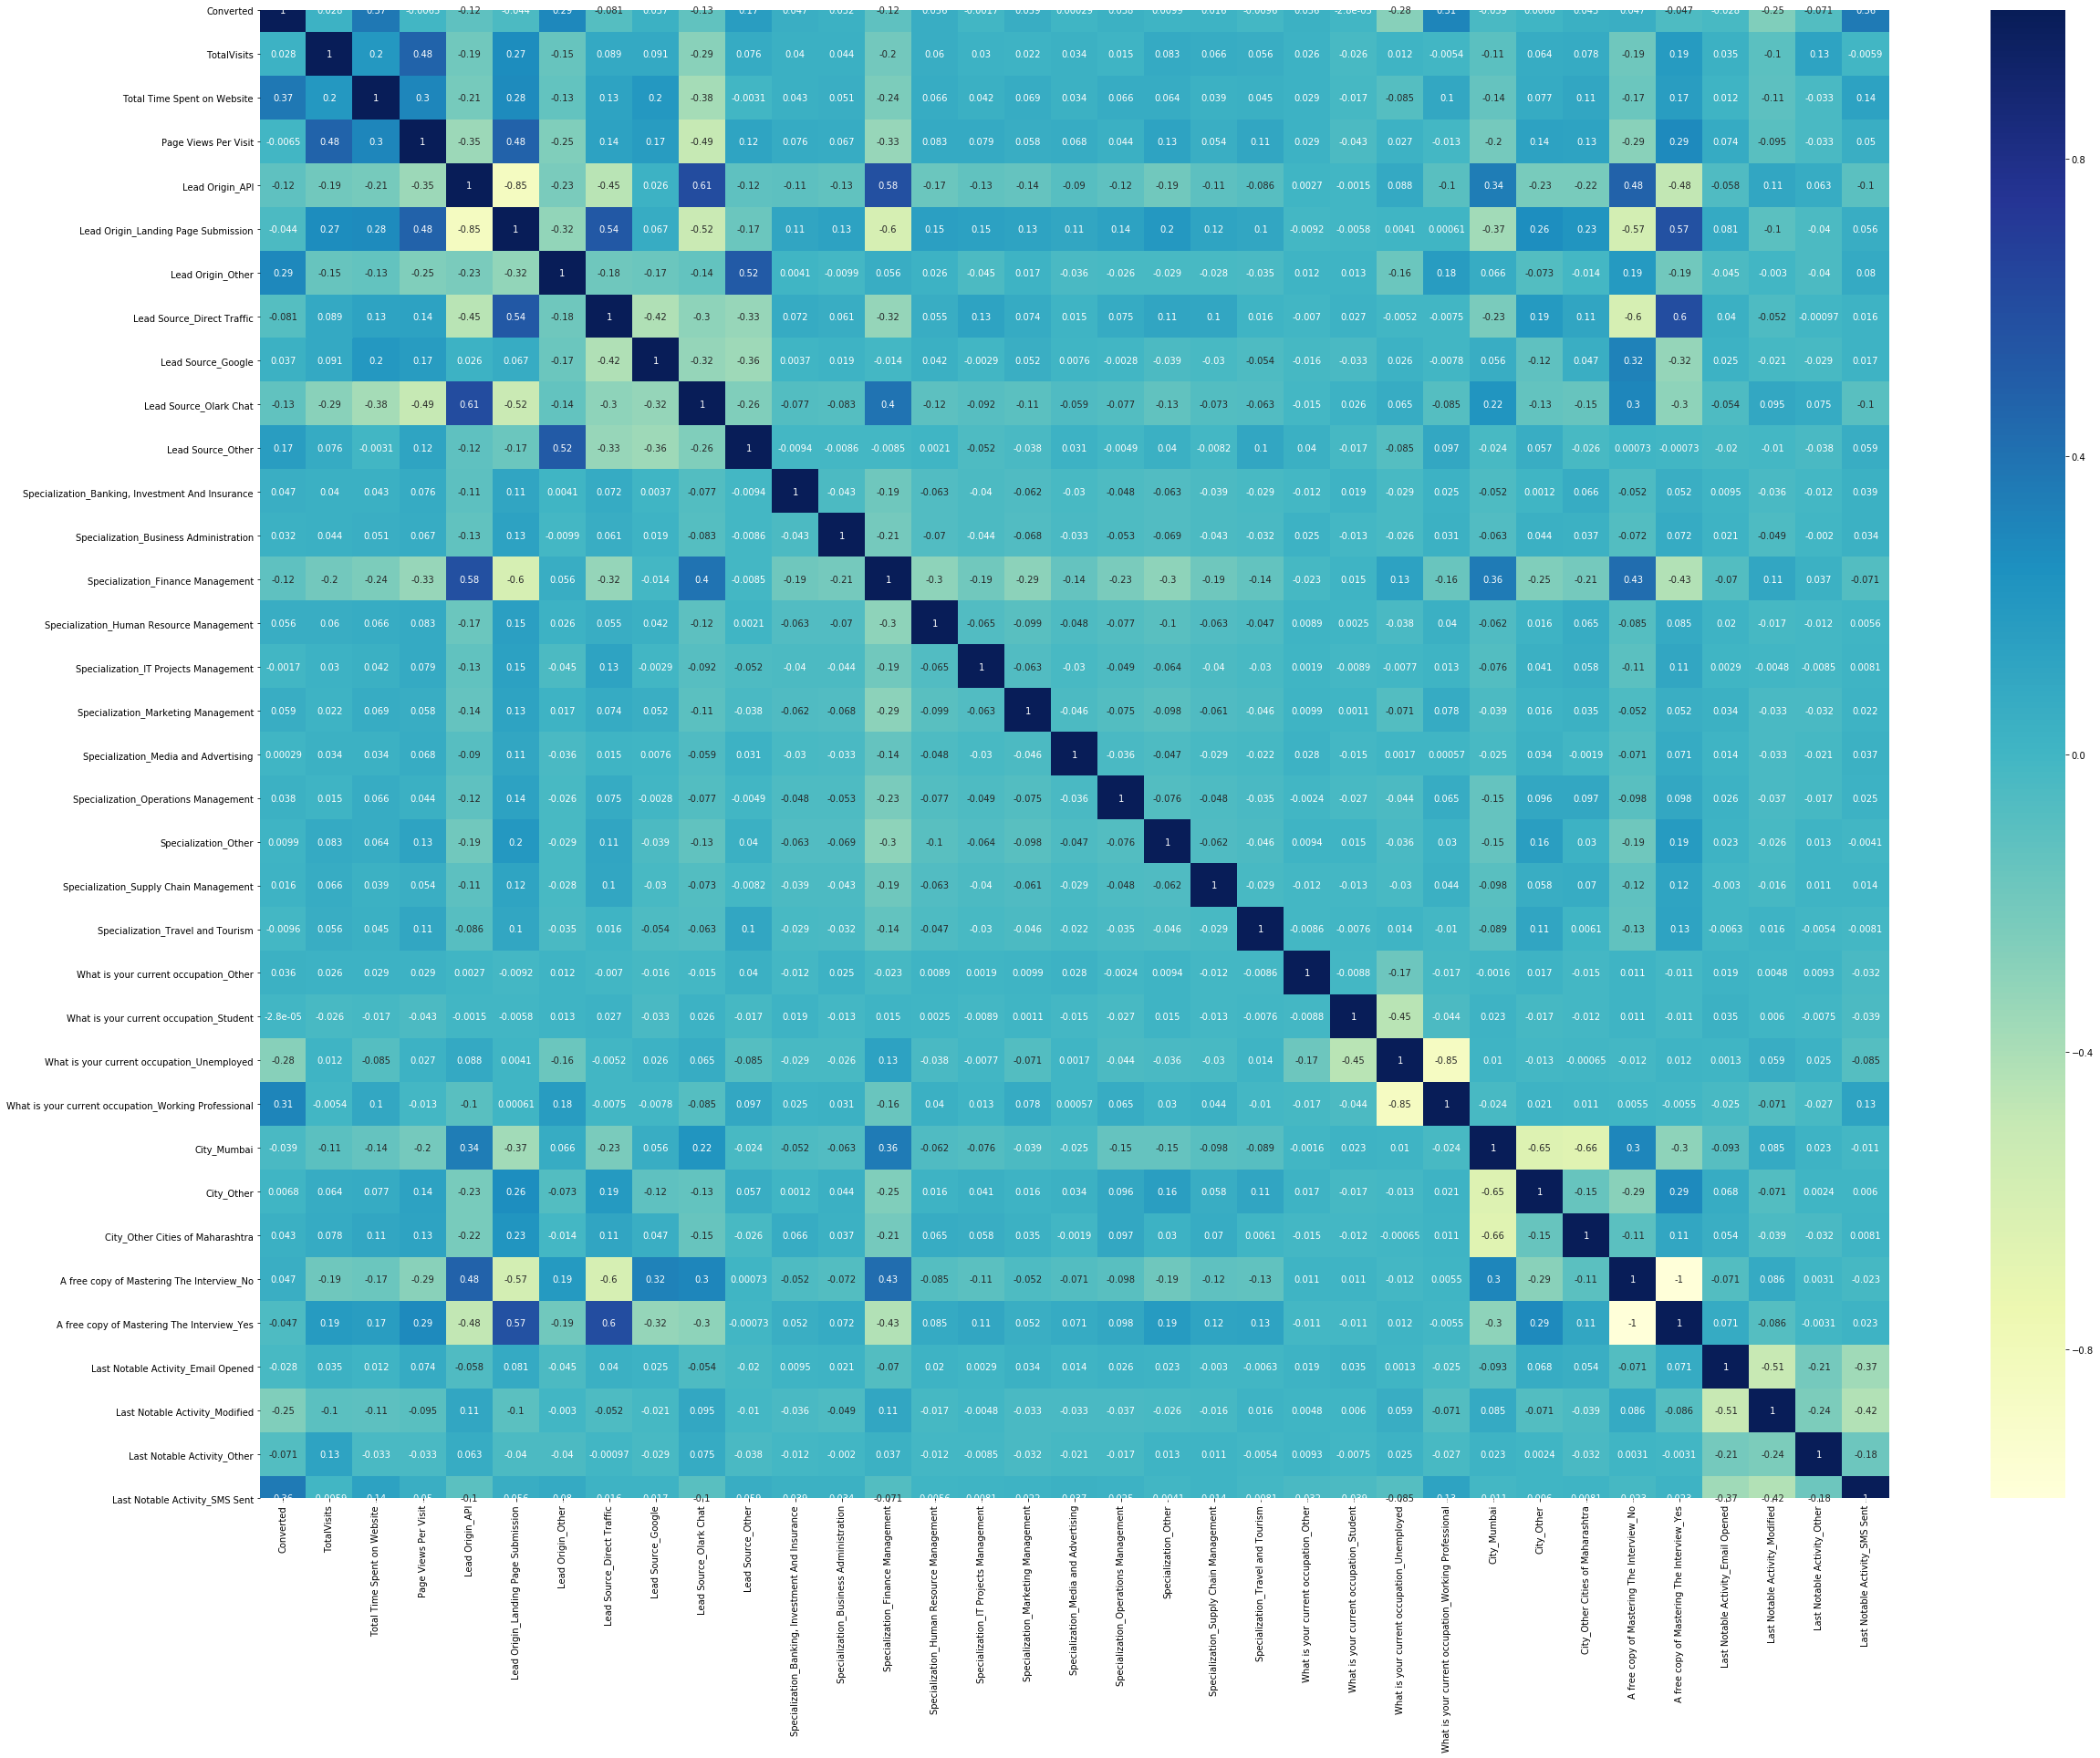

In [63]:
# Let's see the correlation matrix of our train data

plt.figure(figsize = (40,30))       
sns.heatmap(Leads_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

**We find some correlation between the variables. Lets build our model using RFE and then manually select the variables to arrive at our final model with least multicollinearity.**

# Dividing into X and Y sets for the model building

In [64]:
# Removing the target variable

X_train = Leads_train.drop(['Converted'], axis=1)

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other,City_Other Cities of Maharashtra,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
6627,-0.279870,1.127624,-0.174194,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4953,0.289435,-0.523427,1.195387,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0
5111,0.099666,-0.444980,0.738860,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
1906,-0.279870,1.682232,-0.630721,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
4917,-0.659406,-0.890125,-1.087247,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [65]:
# Assigning target variable to y

y_train = Leads_train['Converted']

y_train.head()

6627    1
4953    0
5111    0
1906    0
4917    0
Name: Converted, dtype: int64

# Building our model using RFE (Recursive Feature Elimination)

## Model I

In [66]:
# Importing Logistic Regression from sklearn as statsmodel will not work with RFE 

from sklearn.linear_model import LogisticRegression
lg_1 = LogisticRegression()

In [67]:
# Importing RFE from sklearn

from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output

rfe = RFE(lg_1, 15)

rfe = rfe.fit(X_train, y_train)

In [68]:
# '.support_' gives an array of boolean values of which, True indicates that those columns are selected after applyng RFE 

rfe.support_

array([False,  True, False,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True])

In [69]:
# Obtaining list of all the variables with boolean and ranking beside
# Those with 'True' are the 15 variables selected using RFE
# '.ranking_' assigns rank to each variable

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', False, 14),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Other', False, 20),
 ('Specialization_Banking, Investment And Insurance', False, 4),
 ('Specialization_Business Administration', False, 12),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', False, 10),
 ('Specialization_IT Projects Management', False, 17),
 ('Specialization_Marketing Management', False, 11),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Operations Management', False, 16),
 ('Specialization_Other', False, 19),
 ('Specialization_Supply Chain Management', False, 15),
 ('Specialization_Travel and Tourism', False, 18),
 ('What is your current occupation_Othe

In [70]:
# Pulling out the variables with boolean 'True' and assigning them to a variable

Features = X_train.columns[rfe.support_]
Features

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Specialization_Finance Management',
       'Specialization_Media and Advertising',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

### Assessing the model with StatsModels

In [71]:
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept 
# Hence, we need to use the command 'add_constant' so that it also fits an intercept

import statsmodels.api as sm

X_train_sm_1 = sm.add_constant(X_train[Features])

lg_1 = sm.GLM(y_train, X_train_sm_1, family = sm.families.Binomial())

Model_1 = lg_1.fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.4
Date:                Mon, 20 Apr 2020   Deviance:                       5596.8
Time:                        23:28:47   Pearson chi2:                 6.97e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9330      0.108      8.678      0.000       0.722       1.144
Total Time Spent on Website                              1.0868      0.039     27.718      0.000       1.010       1.164
Lead Origin_API                                         -0.6000      0.082     -7.308      0.000      -0.761      -0.439
Lead Origin_Landing Page Submission                     -1.0398      0.075    -13.806      0.000      -1.187      -0.892
Lead Origin_Other                                        2.5728      0.118     21.763      0.000       2.341       2.805
Lead Source_Direct Traffic                              -0.3695      0.088     -4.189      0.000      -0.542      -0.197
Lead Source_Olark Chat                                   0.7891      0.116      6.786      0.000       0.561       1.017
Specialization_Finance Management                       -0.5747      0.088     -6.505      0.000      -0.748      -0.402
Specialization_Media and Advertising                    -0.3623      0.223     -1.626      0.104      -0.799       0.074
What is your current occupation_Other                    0.5868      0.427      1.375      0.169      -0.250       1.423
What is your current occupation_Student                 -0.4866      0.211     -2.309      0.021      -0.900      -0.074
What is your current occupation_Unemployed              -0.8935      0.131     -6.807      0.000      -1.151      -0.636
What is your current occupation_Working Professional     1.7264      0.183      9.412      0.000       1.367       2.086
Last Notable Activity_Modified                          -0.8261      0.084     -9.799      0.000      -0.991      -0.661
Last Notable Activity_Other                             -0.4051      0.126     -3.217      0.001      -0.652      -0.158
Last Notable Activity_SMS Sent                           1.4205      0.087     16.284      0.000       1.250       1.591
========================================================================================================================
"""

**Few P-values are high. Lets perform mannual feature elimination using P-values and VIFs.**

In [72]:
# Getting the predicted y-values on the train set
# Looking at the first ten values

y_train_pred_1 = Model_1.predict(X_train_sm_1)
y_train_pred_1[:10]

6627    0.838309
4953    0.083525
5111    0.120438
1906    0.872368
4917    0.152050
1457    0.105301
5561    0.964483
5161    0.060144
5147    0.135477
3260    0.105301
dtype: float64

In [73]:
# Reshaping the data
# Numpy allow us to give one of new shape parameter as -1. 
# It simply means that it is an unknown dimension and we want numpy to figure it out.

y_train_pred_1 = y_train_pred_1.values.reshape(-1)
y_train_pred_1[:10]

array([0.83830891, 0.08352516, 0.12043773, 0.87236831, 0.15204994,
       0.10530054, 0.96448302, 0.06014434, 0.13547667, 0.10530054])

### Creating a dataframe with the actual converted and the predicted converted probabilities

In [74]:
Prob_1 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_1})

Prob_1['Lead'] = y_train.index

Prob_1.head()

,Converted,Predicted_prob,Lead
0,1,0.838309,6627
1,0,0.083525,4953
2,0,0.120438,5111
3,0,0.872368,1906
4,0,0.152050,4917


### Creating new column 'Predicted' with values '1' if 'Predicted_prob > 0.5' else '0'

In [75]:
# Logistic regression will not create labels as such. 
# So, we create labels by assigning the predicted probabilities a cut off value.

Prob_1['Predicted'] = Prob_1.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_1.head()

,Converted,Predicted_prob,Lead,Predicted
0,1,0.838309,6627,1
1,0,0.083525,4953,0
2,0,0.120438,5111,0
3,0,0.872368,1906,1
4,0,0.152050,4917,0


### Lets check the accuracy of the model using confusion matrix

__Confusion matrix__

A confusion matrix, also known as error matrix, is a table that is often used to describe the performance of a model on a set of data for which the true values are known. It contains:
- True Negative
- False Negative
- False Positive
- True Positive

This matrix can be used to calculate few important metrics which help in evaluating our model such as:
- Accuracy
- Precision
- Recall/Sensitivity
- Specificity
- F1 score

In [76]:
# To create a confusion matrix, lets import metrics from scikit library

from sklearn import metrics

# Confusion matrix

Confusion_1 = metrics.confusion_matrix(Prob_1.Converted, Prob_1.Predicted)
print(Confusion_1)

[[3511  486]
 [ 757 1714]]


In [77]:
# Checking the accuracy of our model

print(metrics.accuracy_score(Prob_1.Converted, Prob_1.Predicted))

0.8078231292517006


### VIF(Variance Inflation Factor)

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our model. We generally want a VIF that is less than 5.

In [78]:
# Importing VIF from statsmodels

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_1 = pd.DataFrame()

VIF_1['Variables'] = X_train[Features].columns

VIF_1['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_1['VIF'] = round(VIF_1['VIF'], 2)

VIF_1 = VIF_1.sort_values(by = "VIF", ascending = False)

VIF_1

,Variables,VIF
1,Lead Origin_API,inf
2,Lead Origin_Landing Page Submission,inf
3,Lead Origin_Other,inf
8,What is your current occupation_Other,inf
9,What is your current occupation_Student,inf
10,What is your current occupation_Unemployed,inf
11,What is your current occupation_Working Profes...,inf
5,Lead Source_Olark Chat,1.79
6,Specialization_Finance Management,1.70
12,Last Notable Activity_Modified,1.42


**The VIF of 'inf'(infinite) indicates that those variables are completely correlated with all variables. Lets drop one variable 'What is your current occupation_Other' as it has high p-value and high VIF.**

In [80]:
# Dropping the variable 'What is your current occupation_Other'

Features = Features.drop('What is your current occupation_Other', 1)
Features

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Specialization_Finance Management',
       'Specialization_Media and Advertising',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Model II

In [81]:
# Let's build second model after dropping 'What is your current occupation_Other'

X_train_sm_2 = sm.add_constant(X_train[Features])

lg_2 = sm.GLM(y_train, X_train_sm_2, family = sm.families.Binomial())

Model_2 = lg_2.fit()

Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.4
Date:                Mon, 20 Apr 2020   Deviance:                       5596.8
Time:                        23:28:48   Pearson chi2:                 6.97e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3732      0.404      3.400      0.001       0.582       2.165
Total Time Spent on Website                              1.0869      0.039     27.680      0.000       1.010       1.164
Lead Origin_API                                         -0.4533      0.152     -2.975      0.003      -0.752      -0.155
Lead Origin_Landing Page Submission                     -0.8931      0.150     -5.947      0.000      -1.187      -0.599
Lead Origin_Other                                        2.7196      0.176     15.421      0.000       2.374       3.065
Lead Source_Direct Traffic                              -0.3695      0.088     -4.185      0.000      -0.542      -0.196
Lead Source_Olark Chat                                   0.7891      0.116      6.795      0.000       0.562       1.017
Specialization_Finance Management                       -0.5747      0.088     -6.501      0.000      -0.748      -0.401
Specialization_Media and Advertising                    -0.3623      0.223     -1.626      0.104      -0.799       0.075
What is your current occupation_Student                 -1.0736      0.578     -1.859      0.063      -2.206       0.058
What is your current occupation_Unemployed              -1.4804      0.536     -2.765      0.006      -2.530      -0.431
What is your current occupation_Working Professional     1.1395      0.561      2.032      0.042       0.040       2.239
Last Notable Activity_Modified                          -0.8262      0.084     -9.799      0.000      -0.991      -0.661
Last Notable Activity_Other                             -0.4051      0.126     -3.219      0.001      -0.652      -0.158
Last Notable Activity_SMS Sent                           1.4205      0.087     16.276      0.000       1.249       1.592
========================================================================================================================
"""

**P-value of 'Specialization_Media and Advertising' is very high followed by 'What is your current occupation_Student'. Lets check VIFs too.**

In [82]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_2 = Model_2.predict(X_train_sm_2)
y_train_pred_2[:10]

6627    0.838317
4953    0.083521
5111    0.120432
1906    0.872380
4917    0.152043
1457    0.105295
5561    0.964486
5161    0.060141
5147    0.135471
3260    0.105295
dtype: float64

In [83]:
# Reshaping the data

y_train_pred_2 = y_train_pred_2.values.reshape(-1)
y_train_pred_2[:10]

array([0.83831739, 0.08352123, 0.12043153, 0.8723797 , 0.1520426 ,
       0.10529539, 0.96448566, 0.06014118, 0.13547083, 0.10529539])

### Creating a dataframe with the actual converted and the predicted probabilities

In [84]:
Prob_2 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_2})

Prob_2['Lead'] = y_train.index

Prob_2.head()

,Converted,Predicted_prob,Lead
0,1,0.838317,6627
1,0,0.083521,4953
2,0,0.120432,5111
3,0,0.872380,1906
4,0,0.152043,4917


### Creating new column 'Predicted' with values '1' if 'Predicted_Prob > 0.5' else '0'

In [85]:
Prob_2['Predicted'] = Prob_2.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_2.head()

,Converted,Predicted_prob,Lead,Predicted
0,1,0.838317,6627,1
1,0,0.083521,4953,0
2,0,0.120432,5111,0
3,0,0.872380,1906,1
4,0,0.152043,4917,0


### Confusion matrix and Accuracy

In [86]:
# Confusion matrix

Confusion_2 = metrics.confusion_matrix(Prob_2.Converted, Prob_2.Predicted)
print(Confusion_2)

[[3511  486]
 [ 757 1714]]


In [87]:
# Checking the accuracy of our model

print(metrics.accuracy_score(Prob_2.Converted, Prob_2.Predicted))

0.8078231292517006


### Checking VIF

In [88]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_2 = pd.DataFrame()

VIF_2['Variables'] = X_train[Features].columns

VIF_2['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_2['VIF'] = round(VIF_2['VIF'], 2)

VIF_2 = VIF_2.sort_values(by = "VIF", ascending = False)

VIF_2

,Variables,VIF
2,Lead Origin_Landing Page Submission,159.81
1,Lead Origin_API,116.87
9,What is your current occupation_Unemployed,27.32
3,Lead Origin_Other,24.64
10,What is your current occupation_Working Profes...,21.93
8,What is your current occupation_Student,7.41
5,Lead Source_Olark Chat,1.79
6,Specialization_Finance Management,1.70
4,Lead Source_Direct Traffic,1.42
11,Last Notable Activity_Modified,1.42


**The VIF of 'Lead Origin_Landing Page Submission' is very high. Lets drop it and rebuild our model.**

In [89]:
# Dropping the variable 'Lead Origin_Landing Page Submission'

Features = Features.drop('Lead Origin_Landing Page Submission', 1)
Features

Index(['Total Time Spent on Website', 'Lead Origin_API', 'Lead Origin_Other',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Specialization_Finance Management',
       'Specialization_Media and Advertising',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Model III

In [90]:
# Let's build third model after dropping 'Lead Origin_Landing Page Submission'

X_train_sm_3 = sm.add_constant(X_train[Features])

lg_3 = sm.GLM(y_train, X_train_sm_3, family = sm.families.Binomial())

Model_3 = lg_3.fit()

Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2798.4
Date:                Mon, 20 Apr 2020   Deviance:                       5596.8
Time:                        23:28:49   Pearson chi2:                 6.97e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4801      0.539      0.891      0.373      -0.576       1.536
Total Time Spent on Website                              1.0869      0.039     27.689      0.000       1.010       1.164
Lead Origin_API                                          0.4399      0.110      3.992      0.000       0.224       0.656
Lead Origin_Other                                        3.6128      0.167     21.578      0.000       3.285       3.941
Lead Source_Direct Traffic                              -0.3695      0.088     -4.187      0.000      -0.542      -0.197
Lead Source_Olark Chat                                   0.7891      0.116      6.805      0.000       0.562       1.016
Specialization_Finance Management                       -0.5748      0.088     -6.504      0.000      -0.748      -0.402
Specialization_Media and Advertising                    -0.3623      0.223     -1.626      0.104      -0.799       0.074
What is your current occupation_Student                 -1.0736      0.578     -1.859      0.063      -2.206       0.059
What is your current occupation_Unemployed              -1.4805      0.536     -2.764      0.006      -2.530      -0.431
What is your current occupation_Working Professional     1.1395      0.561      2.031      0.042       0.040       2.239
Last Notable Activity_Modified                          -0.8262      0.084     -9.810      0.000      -0.991      -0.661
Last Notable Activity_Other                             -0.4051      0.126     -3.223      0.001      -0.651      -0.159
Last Notable Activity_SMS Sent                           1.4206      0.087     16.279      0.000       1.250       1.592
========================================================================================================================
"""

**P-value of 'Specialization_Media and Advertising' is very high followed by 'What is your current occupation_Student'. Lets check VIFs too.**

In [91]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_3 = Model_3.predict(X_train_sm_3)
y_train_pred_3[:10]

6627    0.838319
4953    0.083520
5111    0.120430
1906    0.872381
4917    0.152040
1457    0.105293
5561    0.964486
5161    0.060140
5147    0.135469
3260    0.105293
dtype: float64

In [92]:
# Reshaping the data

y_train_pred_3 = y_train_pred_3.values.reshape(-1)
y_train_pred_3[:10]

array([0.83831906, 0.08351998, 0.12042966, 0.87238075, 0.15203976,
       0.10529313, 0.9644862 , 0.06014023, 0.13546924, 0.10529313])

### Creating a dataframe with the actual converted and the predicted probabilities

In [93]:
Prob_3 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_3})

Prob_3['Lead'] = y_train.index

Prob_3.head()

,Converted,Predicted_prob,Lead
0,1,0.838319,6627
1,0,0.083520,4953
2,0,0.120430,5111
3,0,0.872381,1906
4,0,0.152040,4917


### Creating new column 'Predicted' with values '1' if 'Predicted_Prob > 0.5' else '0'

In [94]:
Prob_3['Predicted'] = Prob_3.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_3.head()

,Converted,Predicted_prob,Lead,Predicted
0,1,0.838319,6627,1
1,0,0.083520,4953,0
2,0,0.120430,5111,0
3,0,0.872381,1906,1
4,0,0.152040,4917,0


### Confusion matrix and Accuracy

In [95]:
# Confusion matrix

Confusion_3 = metrics.confusion_matrix(Prob_3.Converted, Prob_3.Predicted)
print(Confusion_3)

[[3511  486]
 [ 757 1714]]


In [96]:
# Checking the accuracy of our model

print(metrics.accuracy_score(Prob_3.Converted, Prob_3.Predicted))

0.8078231292517006


### Checking VIF

In [97]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_3 = pd.DataFrame()

VIF_3['Variables'] = X_train[Features].columns

VIF_3['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_3['VIF'] = round(VIF_3['VIF'], 2)

VIF_3 = VIF_3.sort_values(by = "VIF", ascending = False)

VIF_3

,Variables,VIF
8,What is your current occupation_Unemployed,5.61
1,Lead Origin_API,4.16
5,Specialization_Finance Management,3.21
10,Last Notable Activity_Modified,2.24
4,Lead Source_Olark Chat,2.21
3,Lead Source_Direct Traffic,1.96
12,Last Notable Activity_SMS Sent,1.81
2,Lead Origin_Other,1.48
9,What is your current occupation_Working Profes...,1.46
11,Last Notable Activity_Other,1.31


**The VIF of variables have decreased significantly. The variable 'Specialization_Media and Advertising' has high P-value. Lets drop it this time.**

In [98]:
# Dropping the variable 'Specialization_Media and Advertising'

Features = Features.drop('Specialization_Media and Advertising', 1)
Features

Index(['Total Time Spent on Website', 'Lead Origin_API', 'Lead Origin_Other',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Specialization_Finance Management',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Model IV

In [99]:
# Let's build fourth model after dropping 'Specialization_Media and Advertising'

X_train_sm_4 = sm.add_constant(X_train[Features])

lg_4 = sm.GLM(y_train, X_train_sm_4, family = sm.families.Binomial())

Model_4 = lg_4.fit()

Model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2799.7
Date:                Mon, 20 Apr 2020   Deviance:                       5599.5
Time:                        23:28:50   Pearson chi2:                 6.95e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4463      0.542      0.824      0.410      -0.615       1.508
Total Time Spent on Website                              1.0872      0.039     27.704      0.000       1.010       1.164
Lead Origin_API                                          0.4457      0.110      4.048      0.000       0.230       0.661
Lead Origin_Other                                        3.6195      0.167     21.634      0.000       3.292       3.947
Lead Source_Direct Traffic                              -0.3631      0.088     -4.121      0.000      -0.536      -0.190
Lead Source_Olark Chat                                   0.7887      0.116      6.804      0.000       0.562       1.016
Specialization_Finance Management                       -0.5602      0.088     -6.373      0.000      -0.733      -0.388
What is your current occupation_Student                 -1.0543      0.580     -1.817      0.069      -2.192       0.083
What is your current occupation_Unemployed              -1.4660      0.539     -2.721      0.007      -2.522      -0.410
What is your current occupation_Working Professional     1.1520      0.564      2.042      0.041       0.046       2.258
Last Notable Activity_Modified                          -0.8251      0.084     -9.799      0.000      -0.990      -0.660
Last Notable Activity_Other                             -0.4028      0.126     -3.206      0.001      -0.649      -0.157
Last Notable Activity_SMS Sent                           1.4164      0.087     16.247      0.000       1.245       1.587
========================================================================================================================
"""

In [100]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_4 = Model_4.predict(X_train_sm_4)
y_train_pred_4[:10]

6627    0.835164
4953    0.082123
5111    0.121197
1906    0.869424
4917    0.152382
1457    0.105425
5561    0.963784
5161    0.059462
5147    0.133479
3260    0.105425
dtype: float64

In [101]:
# Reshaping the data

y_train_pred_4 = y_train_pred_4.values.reshape(-1)
y_train_pred_4[:10]

array([0.83516397, 0.08212297, 0.12119671, 0.86942398, 0.15238242,
       0.1054255 , 0.96378393, 0.05946161, 0.13347864, 0.1054255 ])

### Creating a dataframe with the actual converted and the predicted probabilities

In [102]:
Prob_4 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_4})

Prob_4['Lead'] = y_train.index

Prob_4.head()

,Converted,Predicted_prob,Lead
0,1,0.835164,6627
1,0,0.082123,4953
2,0,0.121197,5111
3,0,0.869424,1906
4,0,0.152382,4917


### Creating new column 'Predicted' with values '1' if 'Converted_Prob > 0.5' else '0'

In [103]:
Prob_4['Predicted'] = Prob_4.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_4.head()

,Converted,Predicted_prob,Lead,Predicted
0,1,0.835164,6627,1
1,0,0.082123,4953,0
2,0,0.121197,5111,0
3,0,0.869424,1906,1
4,0,0.152382,4917,0


### Confusion matrix and Accuracy

In [104]:
# Confusion matrix

Confusion_4 = metrics.confusion_matrix(Prob_4.Converted, Prob_4.Predicted)
print(Confusion_4)

[[3507  490]
 [ 760 1711]]


In [105]:
# Checking the accuracy of our model

print(metrics.accuracy_score(Prob_4.Converted, Prob_4.Predicted))

0.8067408781694496


### Checking VIF

In [106]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_4 = pd.DataFrame()

VIF_4['Variables'] = X_train[Features].columns

VIF_4['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_4['VIF'] = round(VIF_4['VIF'], 2)

VIF_4 = VIF_4.sort_values(by = "VIF", ascending = False)

VIF_4

,Variables,VIF
7,What is your current occupation_Unemployed,5.49
1,Lead Origin_API,4.15
5,Specialization_Finance Management,3.18
9,Last Notable Activity_Modified,2.24
4,Lead Source_Olark Chat,2.21
3,Lead Source_Direct Traffic,1.95
11,Last Notable Activity_SMS Sent,1.81
2,Lead Origin_Other,1.47
8,What is your current occupation_Working Profes...,1.46
10,Last Notable Activity_Other,1.31


**The variable 'What is your current occupation_Unemployed' has high VIF. Lets drop it this time.**

In [107]:
# Dropping the variable 'What is your current occupation_Unemployed'

Features = Features.drop('What is your current occupation_Unemployed', 1)
Features

Index(['Total Time Spent on Website', 'Lead Origin_API', 'Lead Origin_Other',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Specialization_Finance Management',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Other',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Model V

In [108]:
# Let's build fifth model after dropping 'What is your current occupation_Unemployed'

X_train_sm_5 = sm.add_constant(X_train[Features])

lg_5 = sm.GLM(y_train, X_train_sm_5, family = sm.families.Binomial())

Model_5 = lg_5.fit()

Model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2803.6
Date:                Mon, 20 Apr 2020   Deviance:                       5607.2
Time:                        23:28:51   Pearson chi2:                 6.96e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0111      0.080    -12.699      0.000      -1.167      -0.855
Total Time Spent on Website                              1.0885      0.039     27.762      0.000       1.012       1.165
Lead Origin_API                                          0.4541      0.110      4.130      0.000       0.239       0.670
Lead Origin_Other                                        3.6299      0.167     21.709      0.000       3.302       3.958
Lead Source_Direct Traffic                              -0.3622      0.088     -4.114      0.000      -0.535      -0.190
Lead Source_Olark Chat                                   0.7858      0.116      6.783      0.000       0.559       1.013
Specialization_Finance Management                       -0.5688      0.088     -6.475      0.000      -0.741      -0.397
What is your current occupation_Student                  0.4047      0.222      1.824      0.068      -0.030       0.840
What is your current occupation_Working Professional     2.6105      0.176     14.829      0.000       2.266       2.956
Last Notable Activity_Modified                          -0.8252      0.084     -9.810      0.000      -0.990      -0.660
Last Notable Activity_Other                             -0.4013      0.125     -3.200      0.001      -0.647      -0.155
Last Notable Activity_SMS Sent                           1.4088      0.087     16.173      0.000       1.238       1.580
========================================================================================================================
"""

In [109]:
# Getting the predicted values on the train set
# Looking at the first ten values

y_train_pred_5 = Model_5.predict(X_train_sm_5)
y_train_pred_5[:10]

6627    0.835500
4953    0.082712
5111    0.122130
1906    0.610393
4917    0.153139
1457    0.105827
5561    0.963710
5161    0.059950
5147    0.134584
3260    0.105827
dtype: float64

In [110]:
# Reshaping the data

y_train_pred_5 = y_train_pred_5.values.reshape(-1)
y_train_pred_5[:10]

array([0.83550027, 0.08271153, 0.12213011, 0.61039324, 0.153139  ,
       0.1058266 , 0.96370984, 0.05994994, 0.13458431, 0.1058266 ])

### Creating a dataframe with the actual converted and the predicted probabilities

In [111]:
Prob_5 = pd.DataFrame({'Converted' : y_train.values, 'Predicted_prob' : y_train_pred_5})

Prob_5['Lead'] = y_train.index

Prob_5.head()

,Converted,Predicted_prob,Lead
0,1,0.835500,6627
1,0,0.082712,4953
2,0,0.122130,5111
3,0,0.610393,1906
4,0,0.153139,4917


### Creating new column 'Predicted' with values '1' if 'Predicted_Prob > 0.5' else '0'

In [112]:
Prob_5['Predicted'] = Prob_5.Predicted_prob.map(lambda x: 1 if x > 0.5 else 0)

Prob_5.head()

,Converted,Predicted_prob,Lead,Predicted
0,1,0.835500,6627,1
1,0,0.082712,4953,0
2,0,0.122130,5111,0
3,0,0.610393,1906,1
4,0,0.153139,4917,0


### Confusion matrix and Accuracy

In [113]:
# Confusion matrix

Confusion_5 = metrics.confusion_matrix(Prob_5.Converted, Prob_5.Predicted)
print(Confusion_5)

[[3506  491]
 [ 761 1710]]


In [114]:
# Checking the accuracy of our model

print(metrics.accuracy_score(Prob_5.Converted, Prob_5.Predicted))

0.8064316635745207


### Checking VIF

In [115]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

VIF_5 = pd.DataFrame()

VIF_5['Variables'] = X_train[Features].columns

VIF_5['VIF'] = [variance_inflation_factor(X_train[Features].values, i) for i in range(X_train[Features].shape[1])]

VIF_5['VIF'] = round(VIF_5['VIF'], 2)

VIF_5 = VIF_5.sort_values(by = "VIF", ascending = False)

VIF_5

,Variables,VIF
1,Lead Origin_API,3.77
5,Specialization_Finance Management,3.04
4,Lead Source_Olark Chat,2.21
8,Last Notable Activity_Modified,1.70
10,Last Notable Activity_SMS Sent,1.43
3,Lead Source_Direct Traffic,1.39
2,Lead Origin_Other,1.37
0,Total Time Spent on Website,1.24
9,Last Notable Activity_Other,1.18
7,What is your current occupation_Working Profes...,1.16


**Our VIFs are below 5 and P-values are alsogood enough. We can finalize our model.**

# Calculating other metrics using confusion matrix

In [116]:
# lets get the positions of True positives, True negatives, False positives and False negatives from the final confusion matrix

# True positive(TP) is present in first row and first column of 2 x 2 confusion matrix

TP = Confusion_5[1,1]

# True negative(TN) is present in zeroth row and zeroth column of 2 x 2 confusion matrix

TN = Confusion_5[0,0]

# False positive(FP) is present in zeroth row and first column of 2 x 2 confusion matrix

FP = Confusion_5[0,1]

# False negative(FN) is present in first row and zeroth column of 2 x 2 confusion matrix

FN = Confusion_5[1,0]

__Accuracy__: Accuracy of the model is the proportion of the total number of predictions that were correct.It is given by formula __(TP + TN)/(TP + FP + FN + TN)__.

__Precision__: Probability that a predicted 'Yes' is actually a 'Yes'. It is given by the formula __TP/(TP + FP)__. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. Precision is exactly the same as __Positive Predicted value__.

__Recall__:  Probability that an actual 'Yes' case is predicted correctly. It is given by the formula __TP/(TP + FN)__. The recall is intuitively the ability of the classifier to find all the positive samples. Recall is exactly the same as __Sensitivity or True Positive Rate__.

__Specificity__: It is also called the true negative rate, it measures the proportion of actual negatives that are correctly identified as such. It is given by the formula __TN/(TN + FP)__.

__F1 score__: It is a harmonic mean of precision and recall. It is given by the formula __2(Precision x Recall)/(Precision + Recall)__.

In [117]:
# Accuracy of our final model

print(metrics.accuracy_score(Prob_5.Converted, Prob_5.Predicted))

0.8064316635745207


In [118]:
# Let's see the precision or positive predicted value of our final logistic regression model

Precision = TP/float(TP + FP)
Precision

0.7769195820081781

In [119]:
# Let's see the recall or sensitivity or true positive rate of our final logistic regression model

Recall = TP/float(TP + FN)
Recall

0.6920275192229867

In [120]:
# Let's see the specificity of our final logistic regression model

Specificity = TN/float(TN + FP)
Specificity

0.8771578684013009

In [121]:
# Let's see the F1 score of our final logistic regression model

F1_score = 2*(Precision * Recall)/(Precision + Recall)
F1_score

0.7320205479452055

# ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [122]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve(Prob_5.Converted, Prob_5.Predicted_prob, drop_intermediate = False)

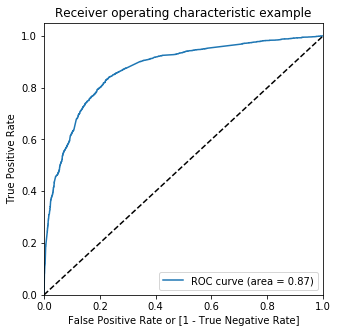

In [124]:
# Drawing ROC curve for our final probability data frame

draw_roc(Prob_5.Converted, Prob_5.Predicted_prob)

**Our ROC curve looks good with an Area Under Curve(AUC) value of 0.87.**

# Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity. It is important to calculate this measure for any model as choosing a random cutoff probability like 0.5 is not suitable for every model.

In [125]:
# Let's create columns with different probability cutoffs ranging from 0 to 1

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    Prob_5[i] = Prob_5.Predicted_prob.map(lambda x: 1 if x > i else 0)

Prob_5.head()

,Converted,Predicted_prob,Lead,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.835500,6627,1,1,1,1,1,1,1,1,1,1,0
1,0,0.082712,4953,0,1,0,0,0,0,0,0,0,0,0
2,0,0.122130,5111,0,1,1,0,0,0,0,0,0,0,0
3,0,0.610393,1906,1,1,1,1,1,1,1,1,0,0,0
4,0,0.153139,4917,0,1,1,0,0,0,0,0,0,0,0


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

Metrics = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])

for i in numbers:
    a = metrics.confusion_matrix(Prob_5.Converted, Prob_5[i])
    b = sum(sum(a))
    Accuracy = (a[0,0] + a[1,1])/b
    Specificity = a[0,0]/(a[0,0] + a[0,1])
    Sensitivity = a[1,1]/(a[1,0] + a[1,1])
    Metrics.loc[i] = [i, Accuracy, Sensitivity, Specificity]

print(Metrics)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.382035     1.000000     0.000000
0.1          0.1  0.544682     0.971671     0.280711
0.2          0.2  0.744434     0.904897     0.645234
0.3          0.3  0.794991     0.841764     0.766075
0.4          0.4  0.804886     0.767301     0.828121
0.5          0.5  0.806432     0.692028     0.877158
0.6          0.6  0.786333     0.572643     0.918439
0.7          0.7  0.768244     0.481182     0.945709
0.8          0.8  0.747372     0.387293     0.969977
0.9          0.9  0.710111     0.262647     0.986740


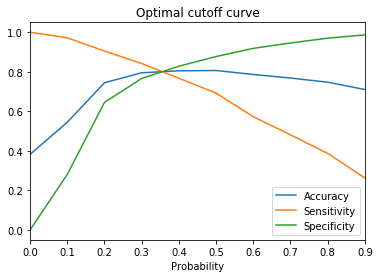

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

Metrics.plot.line(x ='Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.title('Optimal cutoff curve')
plt.show()

__From the curve above, the three lines meet at 0.35. This is our optimum cutoff.__

In [128]:
# Adding the column 'final_predicted' to our dataframe which is obtained with the cutoff value 0.35

Prob_5['Final_predicted'] = Prob_5.Predicted_prob.map(lambda x: 1 if x > 0.35 else 0)

Prob_5.head()

,Converted,Predicted_prob,Lead,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,1,0.835500,6627,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.082712,4953,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.122130,5111,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.610393,1906,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.153139,4917,0,1,1,0,0,0,0,0,0,0,0,0


In [129]:
# Let's check the overall accuracy.

metrics.accuracy_score(Prob_5.Converted, Prob_5.Final_predicted)

0.8008658008658008

In [130]:
# Creating our final confusion matrix with probability cutoff at 0.35

Confusion_6 = metrics.confusion_matrix(Prob_5.Converted, Prob_5.Final_predicted)
Confusion_6

array([[3205,  792],
       [ 496, 1975]], dtype=int64)

In [131]:
TP = Confusion_6[1,1] # true positive 
TN = Confusion_6[0,0] # true negatives
FP = Confusion_6[0,1] # false positives
FN = Confusion_6[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model

Sensitivity = TP / float(TP+FN)
Sensitivity

0.7992715499797652

In [133]:
# Let us calculate specificity

Specificity = TN / float(TN+FP)
Specificity

0.801851388541406

In [134]:
# Precision 

Precision = (TP / float(TP+FP))
Precision

0.7137694253704373

In [135]:
# F1 score

F1_score = 2*(Precision * Recall)/(Precision + Recall)
F1_score

0.7027303432917578

# Precision Recall trade off

It can be helpful to pick a point on the chart that represents a nice mix of precision and recall, and then get a sense of how accurate the model is at that point.

In [136]:
# Importing precision and recall curve from sklearn

from sklearn.metrics import precision_recall_curve

In [137]:
Prob_5.Converted, Prob_5.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    0
 6465    0
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    0
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [138]:
p, r, thresholds = precision_recall_curve(Prob_5.Converted, Prob_5.Predicted_prob)

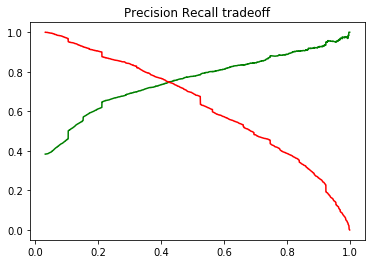

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall tradeoff')
plt.show()

**From the graph, the precision recall trade off value is 0.42. This cutoff will be useful when the company doesn't want to make more phone conversations. Because, an increase in cutoff will result in identifying only the promissing leads thereby reducing the number of phone calls to be made. Using this value in our model will result in decreased sensitivity. So I chose not to use it.**

# Making predictions on the test set

In [140]:
# Dividing test data into X and y sets

X_test = Leads_test.drop(['Converted'], axis=1)
y_test = Leads_test['Converted']

In [141]:
# Scaling the test data

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Other,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other,City_Other Cities of Maharashtra,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
2212,-0.279870,1.114854,-0.174194,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
3034,-0.469638,1.384860,-0.630721,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
4492,-0.469638,-0.528900,-0.630721,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
5063,0.289435,-0.443155,0.054070,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
7645,-0.659406,-0.890125,-1.087247,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0


In [142]:
# Assigning our final list of columns to 'X_test'

X_test_final = X_test[Features]
X_test_final.head()

,Total Time Spent on Website,Lead Origin_API,Lead Origin_Other,Lead Source_Direct Traffic,Lead Source_Olark Chat,Specialization_Finance Management,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
2212,1.114854,1,0,0,0,1,0,0,1,0,0
3034,1.384860,0,1,0,0,1,0,0,1,0,0
4492,-0.528900,1,0,0,1,1,0,0,0,1,0
5063,-0.443155,0,0,0,0,0,0,0,0,0,1
7645,-0.890125,1,0,0,1,1,0,0,1,0,0


In [143]:
# Adding constant to X_test_final

X_test_final_sm = sm.add_constant(X_test_final)

In [144]:
# Making predictions on the test set

y_test_pred = Model_5.predict(X_test_final_sm)

In [145]:
y_test_pred[:10]

2212    0.323566
3034    0.938901
4492    0.211319
5063    0.478840
7645    0.105827
4658    0.461343
7481    0.153139
2608    0.111018
3706    0.203926
5626    0.488262
dtype: float64

In [146]:
# Converting y_pred to a dataframe which is an array

df_test_pred = pd.DataFrame(y_test_pred)
df_test_pred.head()

,0
2212,0.323566
3034,0.938901
4492,0.211319
5063,0.478840
7645,0.105827


In [147]:
# Converting y_test to dataframe

df_test = pd.DataFrame(y_test)
df_test.head()

,Converted
2212,0
3034,1
4492,0
5063,0
7645,0


In [148]:
# Assigning Lead to index

df_test['Lead'] = df_test.index

In [149]:
# Removing index for both dataframes to append them side by side

df_test_pred.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [150]:
# Appending both the dataframes

Prob_test = pd.concat([df_test, df_test_pred],axis=1)

Prob_test.head()

,Converted,Lead,0
0,0,2212,0.323566
1,1,3034,0.938901
2,0,4492,0.211319
3,0,5063,0.478840
4,0,7645,0.105827


In [151]:
# Renaming the column

Prob_test = Prob_test.rename(columns={ 0 : 'Predicted_prob'})

Prob_test.head()

,Converted,Lead,Predicted_prob
0,0,2212,0.323566
1,1,3034,0.938901
2,0,4492,0.211319
3,0,5063,0.478840
4,0,7645,0.105827


In [152]:
# Calculating the final predicted values of test data using optimal cutoff 0.35

Prob_test['Final_predicted'] = Prob_test.Predicted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [153]:
Prob_test.head()

,Converted,Lead,Predicted_prob,Final_predicted
0,0,2212,0.323566,0
1,1,3034,0.938901,1
2,0,4492,0.211319,0
3,0,5063,0.478840,1
4,0,7645,0.105827,0


In [154]:
# Let's check the overall accuracy

metrics.accuracy_score(Prob_test.Converted, Prob_test.Final_predicted)

0.79004329004329

In [155]:
# Confusion matrix for our test data

Confusion_7 = metrics.confusion_matrix(Prob_test.Converted, Prob_test.Final_predicted)
Confusion_7

array([[1322,  360],
       [ 222,  868]], dtype=int64)

In [156]:
TP = Confusion_7[1,1] # true positive 
TN = Confusion_7[0,0] # true negatives
FP = Confusion_7[0,1] # false positives
FN = Confusion_7[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model

Recall = TP / float(TP+FN)
Recall

0.7963302752293578

In [158]:
# Let us calculate specificity

TN / float(TN+FP)

0.7859690844233056

In [159]:
# Let us calculate precision

Precision = TP / float(TP+FP)
Precision

0.7068403908794788

In [160]:
# Let's see the f1 score of our test model

F1_score = 2*(Precision*Recall)/float(Precision + Recall)
F1_score

0.7489214840379638

# Assigning lead score

In [161]:
# Calculating lead score to each of the leads by multiplying the 'Predicted_prob' with 100

Prob_test['Lead_Score'] = Prob_test.Predicted_prob.map(lambda x: round(x*100))

Prob_test.head()

,Converted,Lead,Predicted_prob,Final_predicted,Lead_Score
0,0,2212,0.323566,0,32
1,1,3034,0.938901,1,94
2,0,4492,0.211319,0,21
3,0,5063,0.478840,1,48
4,0,7645,0.105827,0,11


**We have assigned the lead scores to each lead and our final model shows a sensitivity of 79.6% i.e. almost 80% as ball parked by the CEO of the company.**